### Toymodel Train Test Evaluation

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import cLRSolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


#### Set up dataloader, model, solver

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir,
                                  shuffle=True)

In [3]:
generator = BicycleGenerator(generator=ToyGenerator)
discriminator = ToyDiscriminator()

In [4]:
solver = cLRSolver(generator, discriminator, 
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}})

#### Training

In [5]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, steps = {'generator': 1, 'discriminator': 1})

Training new model
G_gan: 0.608	G_norm: 0.813	G_total: 1.421	D_real: 0.587	D_fake: 0.924	D_total: 1.511	
G_gan: 0.628	G_norm: 0.831	G_total: 1.459	D_real: 0.497	D_fake: 0.812	D_total: 1.310	
G_gan: 0.656	G_norm: 0.810	G_total: 1.466	D_real: 0.640	D_fake: 0.831	D_total: 1.471	
G_gan: 0.562	G_norm: 0.775	G_total: 1.337	D_real: 0.604	D_fake: 0.813	D_total: 1.417	
G_gan: 0.642	G_norm: 0.812	G_total: 1.454	D_real: 0.503	D_fake: 0.783	D_total: 1.287	
G_gan: 0.645	G_norm: 0.797	G_total: 1.442	D_real: 0.585	D_fake: 0.781	D_total: 1.366	
G_gan: 0.614	G_norm: 0.841	G_total: 1.454	D_real: 0.474	D_fake: 0.761	D_total: 1.235	
G_gan: 0.629	G_norm: 0.794	G_total: 1.423	D_real: 0.522	D_fake: 0.759	D_total: 1.281	
G_gan: 0.635	G_norm: 0.811	G_total: 1.446	D_real: 0.617	D_fake: 0.752	D_total: 1.370	
G_gan: 0.614	G_norm: 0.787	G_total: 1.401	D_real: 0.630	D_fake: 0.775	D_total: 1.406	
G_gan: 0.656	G_norm: 0.832	G_total: 1.488	D_real: 0.564	D_fake: 0.764	D_total: 1.328	
G_gan: 0.674	G_norm: 0.825	G_total:

#### Test

In [6]:
output = solver.test(trainloader)

[autoreload of mapsgan.losses failed: Traceback (most recent call last):
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._

#### Evaluation
visualization of predicted trajectories

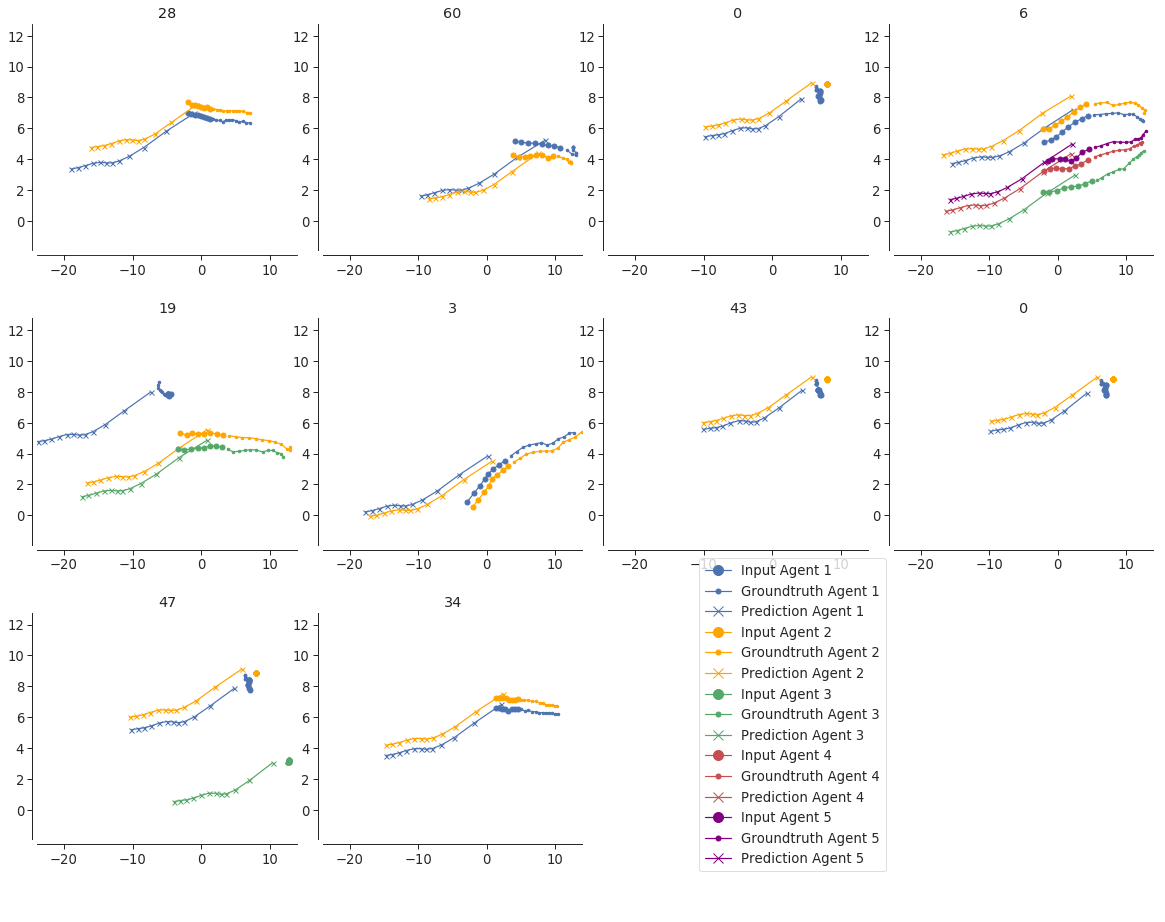

In [7]:
vis = Visualization()
ll = vis.trajectories(output, scenes=[10])